In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/archive (6)/CWRU_48k_load_1_CNN_data.npz'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [51]:
data_time = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/archive (6)/feature_time_48k_2048_load_1.csv")
data_time

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,Ball_007_1
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,Ball_007_1
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,Ball_007_1
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,Ball_007_1
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,Ball_007_1
...,...,...,...,...,...,...,...,...,...,...
2295,0.21425,-0.19839,0.010769,0.064100,0.064983,-0.212497,-0.119312,3.297037,6.034174,Normal_1
2296,0.21967,-0.20882,0.013136,0.068654,0.069883,-0.061308,-0.295122,3.143410,5.319958,Normal_1
2297,0.20799,-0.21613,0.012571,0.067128,0.068279,-0.154754,-0.071405,3.046161,5.431299,Normal_1
2298,0.21425,-0.22405,0.012608,0.066813,0.067977,-0.326966,0.023662,3.151821,5.391672,Normal_1


In [52]:
train_data, test_data = train_test_split(data_time, test_size = 750, stratify = data_time['fault'], random_state = 1234)
test_data['fault'].value_counts()

,count
fault,
OR_007_6_1,75
IR_014_1,75
OR_014_6_1,75
OR_021_6_1,75
Normal_1,75
IR_021_1,75
Ball_014_1,75
Ball_007_1,75
Ball_021_1,75


In [53]:
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data.iloc[:,:-1])
pd.DataFrame(train_data_scaled).describe()

,0,1,2,3,4,5,6,7,8
count,1.550000e+03,1.550000e+03,1.550000e+03,1.550000e+03,1.550000e+03,1.550000e+03,1.550000e+03,1.550000e+03,1.550000e+03
mean,1.260640e-16,1.002782e-16,-2.888012e-16,6.016693e-17,-5.386372e-17,1.833659e-17,-5.500976e-17,4.950878e-16,-2.521281e-17
std,1.000323e+00,1.000323e+00,1.000323e+00,1.000323e+00,1.000323e+00,1.000323e+00,1.000323e+00,1.000323e+00,1.000323e+00
min,-8.877055e-01,-2.951564e+00,-1.935376e+00,-9.258092e-01,-9.231913e-01,-5.951422e+00,-7.874742e-01,-1.481163e+00,-7.775653e-01
25%,-7.088474e-01,-3.753614e-01,-6.908705e-01,-6.755048e-01,-6.760659e-01,-3.678525e-01,-6.073122e-01,-8.064817e-01,-6.475107e-01
50%,-4.958143e-01,5.113022e-01,-3.141526e-01,-5.055027e-01,-5.038108e-01,2.140248e-01,-4.182916e-01,-2.135605e-01,-4.548003e-01
75%,4.477234e-01,7.003484e-01,4.560105e-01,7.015641e-01,7.003255e-01,5.823124e-01,2.860828e-01,5.648177e-01,4.360429e-01
max,3.297226e+00,8.671141e-01,3.503861e+00,2.980548e+00,2.981995e+00,4.906756e+00,6.349353e+00,4.049712e+00,9.629399e+00


In [54]:
test_data_scaled = (test_data.iloc[:,:-1].values - scaler.mean_)/np.sqrt(scaler.var_)
pd.DataFrame(test_data_scaled).describe()

,0,1,2,3,4,5,6,7,8
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,-0.013718,0.003277,-0.018151,-0.013327,-0.013375,-0.035946,0.018838,0.009379,-0.012433
std,0.976752,0.993896,1.003708,0.987301,0.987315,1.105931,1.028360,0.998996,0.936491
min,-0.895968,-2.754539,-1.590184,-0.922087,-0.922953,-6.014935,-0.759377,-1.515700,-0.772309
25%,-0.706453,-0.429163,-0.720867,-0.677965,-0.678545,-0.355683,-0.606352,-0.762882,-0.641796
50%,-0.494044,0.503185,-0.303458,-0.492809,-0.490457,0.224657,-0.415267,-0.219297,-0.452940
75%,0.394936,0.704214,0.401811,0.669274,0.667916,0.576534,0.294171,0.547845,0.447909
max,3.008545,0.861398,3.003970,2.885914,2.887282,6.301407,5.007205,3.784107,3.531440


In [55]:
from sklearn.svm import SVC

In [56]:
svc_model = SVC()
svc_model.fit(train_data_scaled, train_data['fault'])

SVC()

In [57]:
train_predictions = svc_model.predict(train_data_scaled)
test_predictions = svc_model.predict(test_data_scaled)

In [58]:
from sklearn.metrics import classification_report,confusion_matrix

In [59]:
train_confu_matrix = confusion_matrix(train_data['fault'], train_predictions)
test_confu_matrix = confusion_matrix(test_data['fault'], test_predictions)

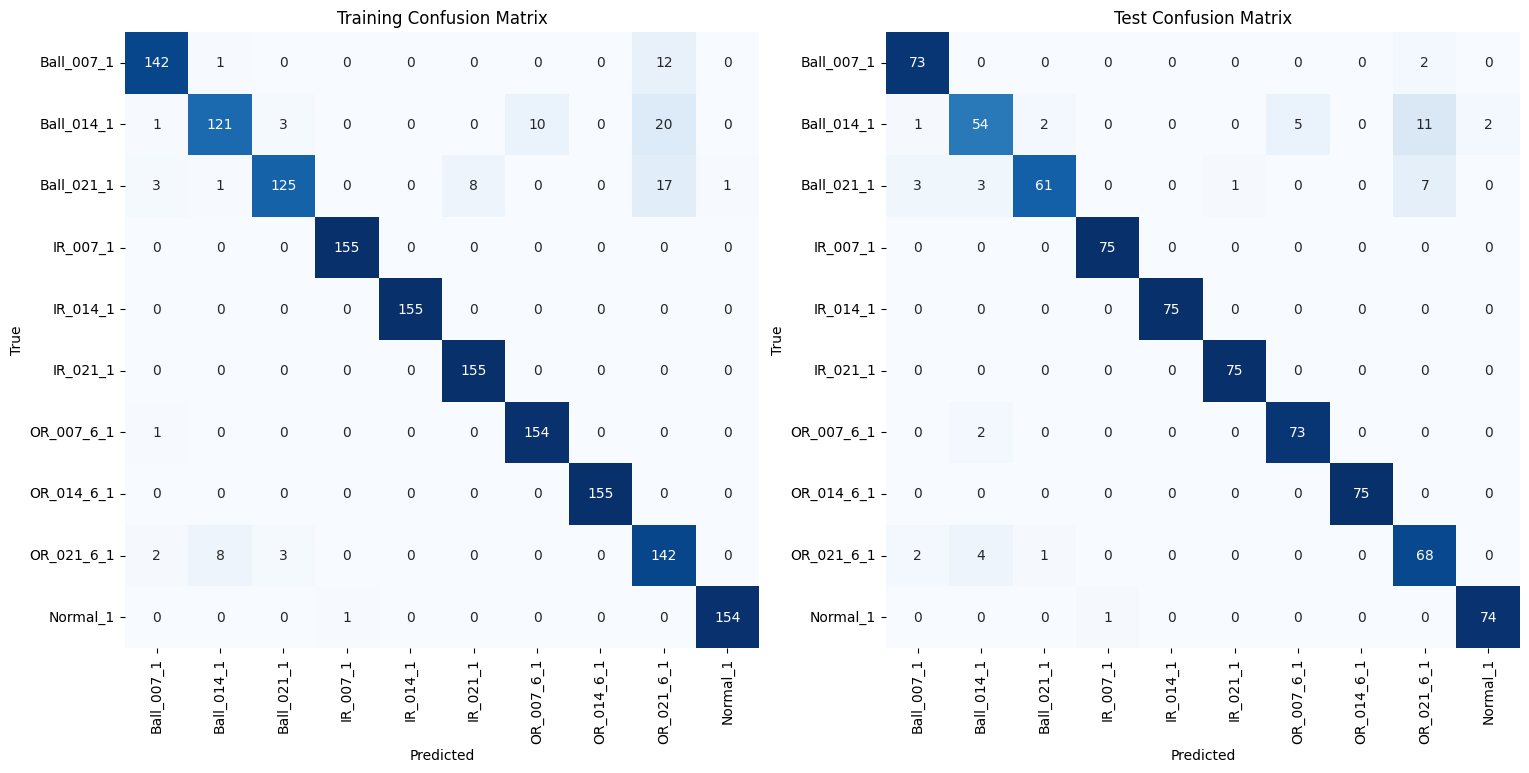

In [60]:
fault_type = data_time.fault.unique()

plt.figure(1,figsize=(18,8))

plt.subplot(121)
sns.heatmap(train_confu_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)

plt.subplot(122)
sns.heatmap(test_confu_matrix, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

In [61]:
class_report = classification_report(y_pred = test_predictions, y_true = test_data['fault'])
print(class_report)

              precision    recall  f1-score   support

  Ball_007_1       0.92      0.97      0.95        75
  Ball_014_1       0.86      0.72      0.78        75
  Ball_021_1       0.95      0.81      0.88        75
    IR_007_1       0.99      1.00      0.99        75
    IR_014_1       1.00      1.00      1.00        75
    IR_021_1       0.99      1.00      0.99        75
    Normal_1       0.94      0.97      0.95        75
  OR_007_6_1       1.00      1.00      1.00        75
  OR_014_6_1       0.77      0.91      0.83        75
  OR_021_6_1       0.97      0.99      0.98        75

    accuracy                           0.94       750
   macro avg       0.94      0.94      0.94       750
weighted avg       0.94      0.94      0.94       750



In [62]:
parameters = {"C":[1, 10, 45, 47,49, 50, 51, 55, 100, 300, 500],
             'gamma':[0.01, 0.05, 0.1, 0.5, 1, 5],
             'kernel':["rbf"]}

In [63]:
tuned_svm_clf = GridSearchCV(SVC(),parameters,n_jobs = -1, cv= 10)
tuned_svm_clf

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 45, 47, 49, 50, 51, 55, 100, 300, 500],
                         'gamma': [0.01, 0.05, 0.1, 0.5, 1, 5],
                         'kernel': ['rbf']})

In [64]:
tuned_svm_clf.fit(train_data_scaled, train_data['fault'])

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 45, 47, 49, 50, 51, 55, 100, 300, 500],
                         'gamma': [0.01, 0.05, 0.1, 0.5, 1, 5],
                         'kernel': ['rbf']})

In [65]:
tuned_svm_clf.best_params_

{'C': 55, 'gamma': 0.05, 'kernel': 'rbf'}

In [66]:
best_clf = tuned_svm_clf.best_estimator_
best_clf

SVC(C=55, gamma=0.05)

In [67]:
train_predictions_best = best_clf.predict(train_data_scaled)
test_predictions_best = best_clf.predict(test_data_scaled)

In [68]:
train_confu_matrix_best = confusion_matrix(train_data['fault'], train_predictions_best)
test_confu_matrix_best = confusion_matrix(test_data['fault'], test_predictions_best)

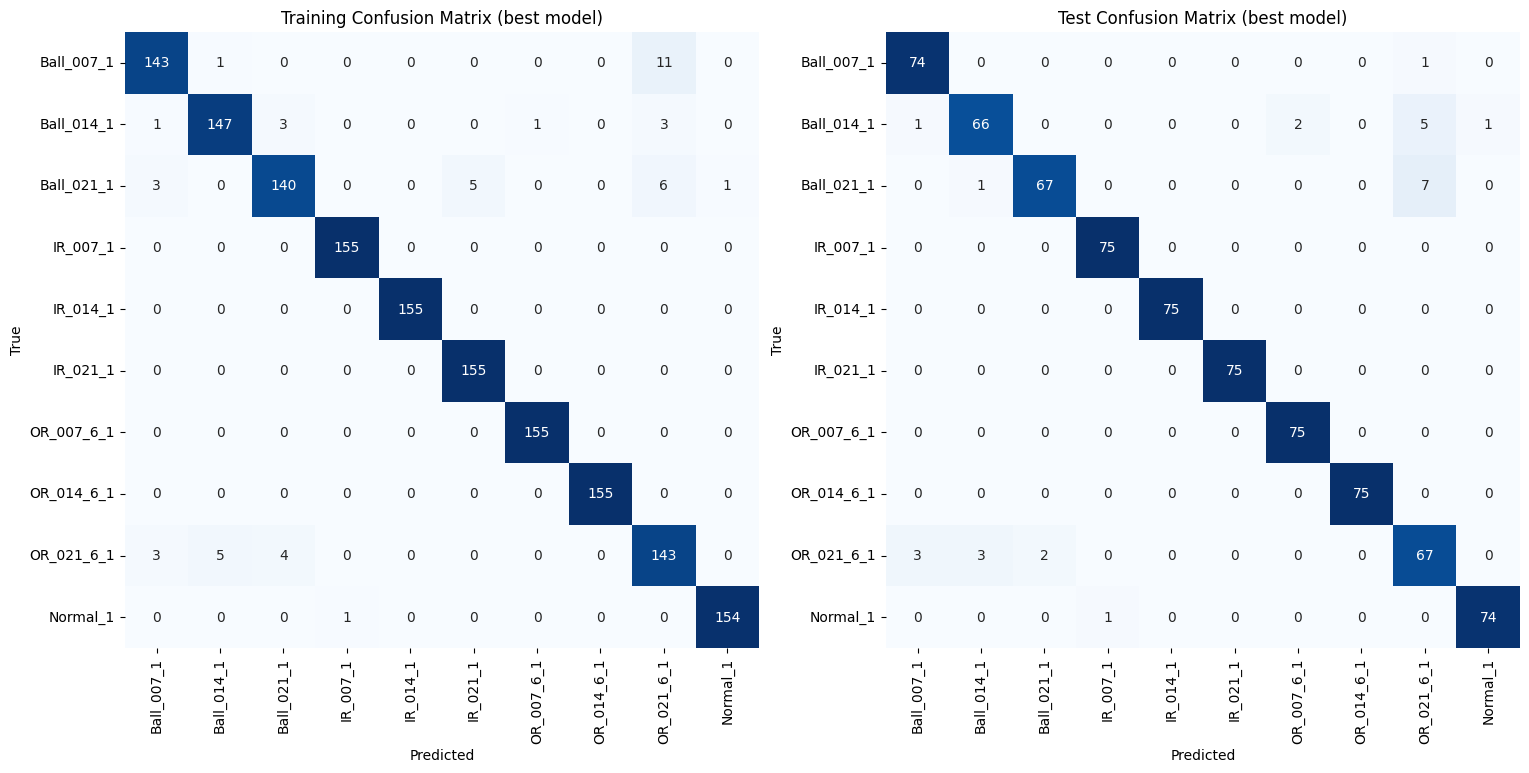

In [70]:
plt.figure(1,figsize=(18,8))

plt.subplot(121)
sns.heatmap(train_confu_matrix_best, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix (best model)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)

plt.subplot(122)
sns.heatmap(test_confu_matrix_best, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix (best model)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [71]:
class_report_best = classification_report(y_pred = test_predictions_best, y_true = test_data['fault'])
print(class_report_best)

              precision    recall  f1-score   support

  Ball_007_1       0.95      0.99      0.97        75
  Ball_014_1       0.94      0.88      0.91        75
  Ball_021_1       0.97      0.89      0.93        75
    IR_007_1       0.99      1.00      0.99        75
    IR_014_1       1.00      1.00      1.00        75
    IR_021_1       1.00      1.00      1.00        75
    Normal_1       0.97      1.00      0.99        75
  OR_007_6_1       1.00      1.00      1.00        75
  OR_014_6_1       0.84      0.89      0.86        75
  OR_021_6_1       0.99      0.99      0.99        75

    accuracy                           0.96       750
   macro avg       0.96      0.96      0.96       750
weighted avg       0.96      0.96      0.96       750



In [78]:
from sklearn.linear_model import LogisticRegression

# Setup the model
logis_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Train the model
logis_model.fit(train_data_scaled, train_data['fault'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [79]:
test_predictions_lr = logis_model.predict(test_data_scaled)
test_confu_matrix_lr = confusion_matrix(test_data['fault'], test_predictions_lr)

In [80]:
class_report_lr = classification_report(y_pred = test_predictions_lr, y_true = test_data['fault'])
print(class_report_lr)

              precision    recall  f1-score   support

  Ball_007_1       0.91      1.00      0.96        75
  Ball_014_1       0.83      0.77      0.80        75
  Ball_021_1       0.92      0.88      0.90        75
    IR_007_1       0.99      1.00      0.99        75
    IR_014_1       1.00      1.00      1.00        75
    IR_021_1       0.99      1.00      0.99        75
    Normal_1       0.94      0.97      0.95        75
  OR_007_6_1       1.00      1.00      1.00        75
  OR_014_6_1       0.86      0.81      0.84        75
  OR_021_6_1       0.99      0.99      0.99        75

    accuracy                           0.94       750
   macro avg       0.94      0.94      0.94       750
weighted avg       0.94      0.94      0.94       750



In [81]:
train_predictions_logis = logis_model.predict(train_data_scaled)
test_predictions_logis = logis_model.predict(test_data_scaled)

In [82]:
class_report_logis = classification_report(y_pred = test_predictions_logis, y_true = test_data['fault'])
print(class_report_logis)

              precision    recall  f1-score   support

  Ball_007_1       0.91      1.00      0.96        75
  Ball_014_1       0.83      0.77      0.80        75
  Ball_021_1       0.92      0.88      0.90        75
    IR_007_1       0.99      1.00      0.99        75
    IR_014_1       1.00      1.00      1.00        75
    IR_021_1       0.99      1.00      0.99        75
    Normal_1       0.94      0.97      0.95        75
  OR_007_6_1       1.00      1.00      1.00        75
  OR_014_6_1       0.86      0.81      0.84        75
  OR_021_6_1       0.99      0.99      0.99        75

    accuracy                           0.94       750
   macro avg       0.94      0.94      0.94       750
weighted avg       0.94      0.94      0.94       750



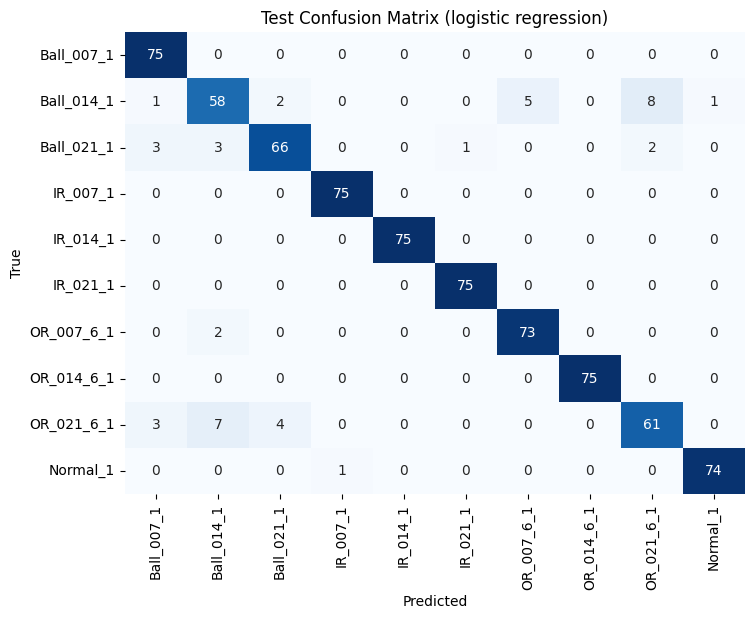

In [83]:
plt.figure(1,figsize=(8,6))

sns.heatmap(test_confu_matrix_lr, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix (logistic regression)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

In [84]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler,MinMaxScaler

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive (6)/feature_time_48k_2048_load_1.csv')

features = ['max', 'min', 'mean', 'sd', 'rms', 'skewness', 'kurtosis', 'crest', 'form']
target = 'fault'
normal_class = 'Normal_1'

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[features])

class Autoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.Sigmoid()
        )
        self.decoder = nn.Sequential(
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

input_dim = len(features)
hidden_dim = 10
autoencoder = Autoencoder(input_dim, hidden_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.001)

num_epochs = 200
batch_size = 32

data_tensor = torch.tensor(data_scaled, dtype=torch.float32)
data_loader = torch.utils.data.DataLoader(data_tensor, batch_size=batch_size, shuffle=True)

for epoch in range(num_epochs):
    total_loss = 0
    for data_batch in data_loader:
        optimizer.zero_grad()
        _, recon_batch = autoencoder(data_batch)
        loss = criterion(recon_batch, data_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(data_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss:.4f}')

encoded_data, _ = autoencoder(data_tensor)
encoded_data_np = encoded_data.detach().numpy()

fault_labels = np.where(data[target] == normal_class, 0, 1)
clf = IsolationForest(contamination=0.001)
clf.fit(encoded_data_np)

pred_labels = clf.predict(encoded_data_np)
anomaly_scores = clf.decision_function(encoded_data_np)

accuracy = np.mean(pred_labels == fault_labels)
print(f'Accuracy: {accuracy:.2%}')

Epoch [1/200], Average Loss: 0.0926
Epoch [2/200], Average Loss: 0.0627
Epoch [3/200], Average Loss: 0.0479
Epoch [4/200], Average Loss: 0.0403
Epoch [5/200], Average Loss: 0.0357
Epoch [6/200], Average Loss: 0.0322
Epoch [7/200], Average Loss: 0.0292
Epoch [8/200], Average Loss: 0.0265
Epoch [9/200], Average Loss: 0.0239
Epoch [10/200], Average Loss: 0.0216
Epoch [11/200], Average Loss: 0.0195
Epoch [12/200], Average Loss: 0.0177
Epoch [13/200], Average Loss: 0.0161
Epoch [14/200], Average Loss: 0.0148
Epoch [15/200], Average Loss: 0.0137
Epoch [16/200], Average Loss: 0.0128
Epoch [17/200], Average Loss: 0.0120
Epoch [18/200], Average Loss: 0.0114
Epoch [19/200], Average Loss: 0.0109
Epoch [20/200], Average Loss: 0.0104
Epoch [21/200], Average Loss: 0.0100
Epoch [22/200], Average Loss: 0.0096
Epoch [23/200], Average Loss: 0.0093
Epoch [24/200], Average Loss: 0.0090
Epoch [25/200], Average Loss: 0.0087
Epoch [26/200], Average Loss: 0.0084
Epoch [27/200], Average Loss: 0.0082
Epoch [28/

89.87%